# **Strategies for Enhancing Customer Lifetime Value in Auto Insurance**

## **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **Business Problem Understanding**

### **Context**
**Customer lifetime value**, or **CLV**, is a measure of **how valuable a customer is to a company**. From this value, the company can determine **how much profit is obtained from one passenger and the costs incurred to acquire or retain new customers**. This number is quite important for a company to know if the company wants to target marketing to valuable customers effectively and how the company's customers will change in the future.

### **Problem Statement**

Knowing a customer's true value is crucial for a business. Without this knowledge, resources might be wasted on the wrong customers. It's essential to balance the cost of getting and keeping customers with the revenue they bring. **As the number of customers grows, tools to predict their future value become vital.**

### **Goals**

Given the challenges outlined, a company requires a tool to anticipate the value each customer offers. This understanding can boost profits, streamline marketing resources, and shape strategic business decisions, ensuring customers receive the right attention. **As the number of customers increases, predictive tools become invaluable in determining a customer's worth to the organization.**

### **Analytics Approach**

To enhance our understanding, we'll analyze the data to identify key patterns. Then, we'll build a **regression model to predict the value of any customer, whether new or existing, to the company.**

### **Metrics Evaluation**

    To evaluate the effectiveness of the regression model, we'll utilize three primary metrics: RMSE (Root Mean Square Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error). RMSE provides the square root of the average squared errors, offering insight into the model's accuracy. MAE gives the average of the absolute errors, reflecting the magnitude of errors without direction, while MAPE offers a percentage-based representation of the prediction error. The lower the values for RMSE, MAE, and MAPE, the more accurate our model is in predicting Customer Lifetime Value, given the constraints of the features utilized.

## **Data Understanding**

- Using Customer Lifetime Values as the Dataset
- The Dataset provide Customer Informations

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | The Vehicle Type |
| Coverage | Object | The type of insurance coverage the customer has chosen |
| Renew Offer Type | Object | The type of renewal offer presented to the customer |
| EmploymentStatus | Object | The employment status of the customer |
| Martial Status | Object |  The marital status of the customer, |
| Education | Object | The educational background of the customer |
| Number of Policies | Float | The number of insurance policies the customer holds. |
| Monthly Premium Auto | Float | The monthly premium amount the customer pays for their auto insurance. |
| Total Claim Amount | Float | The total amount claimed by the customer. |
| Income | Float | The income of the customer. |
| Customer Lifetime Value (CLV) | Float | The value of the customer to the business over time. |

<br>

### **Import Library**

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sketch as sketch

import warnings
warnings.filterwarnings('ignore')

### **Import Dataset**

In [8]:
clv = pd.read_csv('/Purwadhika/Modul 3 Machine Learning/Capstone/data_customer_lifetime_value.csv')
clv.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


## **Exploratory Data Analysis (EDA)**

In [9]:
clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


### Checking the duplicated Values

In [10]:
clv[clv.duplicated()]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


Based on checking the duplicated values. There are **618 duplicate values** in the data. Need to handle these by dropping the duplicates.

618 Duplicated values

### Checking Missing Value

In [11]:
clv.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

No Missing Value

### Checking the Unique Value Count 

In [12]:
clv.nunique()

Vehicle Class                 6
Coverage                      3
Renew Offer Type              4
EmploymentStatus              5
Marital Status                3
Education                     5
Number of Policies            9
Monthly Premium Auto        191
Total Claim Amount         3274
Income                     3625
Customer Lifetime Value    5049
dtype: int64

### Checking The Distribution of Customer Lifetime Value (CLV)

<Axes: xlabel='Customer Lifetime Value'>

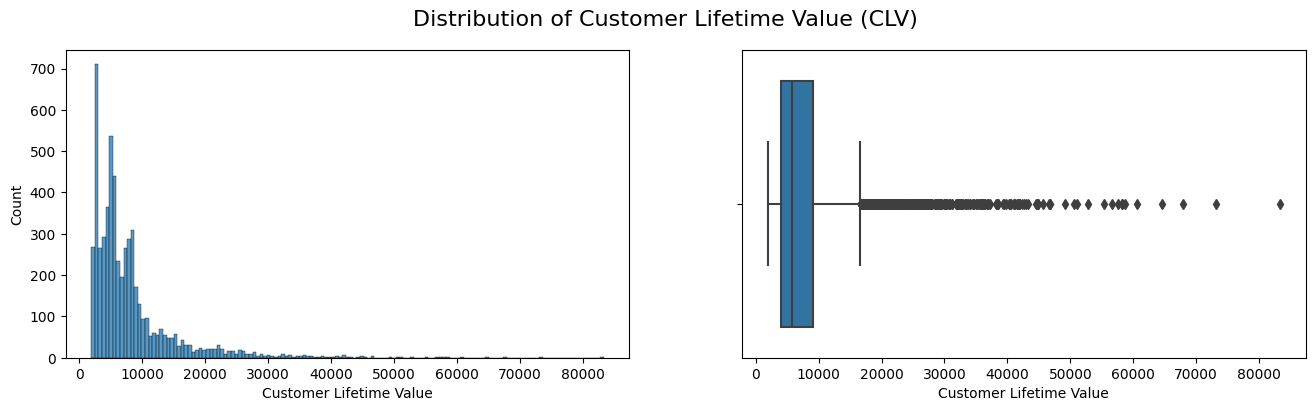

In [13]:
fig = plt.figure(figsize=(16,4))

fig.suptitle('Distribution of Customer Lifetime Value (CLV)', size=16)

plt.subplot(1,2,1)
sns.histplot(data=clv, x='Customer Lifetime Value')

plt.subplot(1,2,2)
sns.boxplot(data=clv, x='Customer Lifetime Value')

Based on the distribution plot of the **Customer Lifetime Value** above, it's evident that the data exhibits a **'right-skewed distribution'**. This suggests that there are many customers with a **'low CLV'** and very few with a **'high CLV'**. Additionally, the boxplot reveals the presence of customers with an **extremely high Customer Lifetime Value** which are considered outliers.

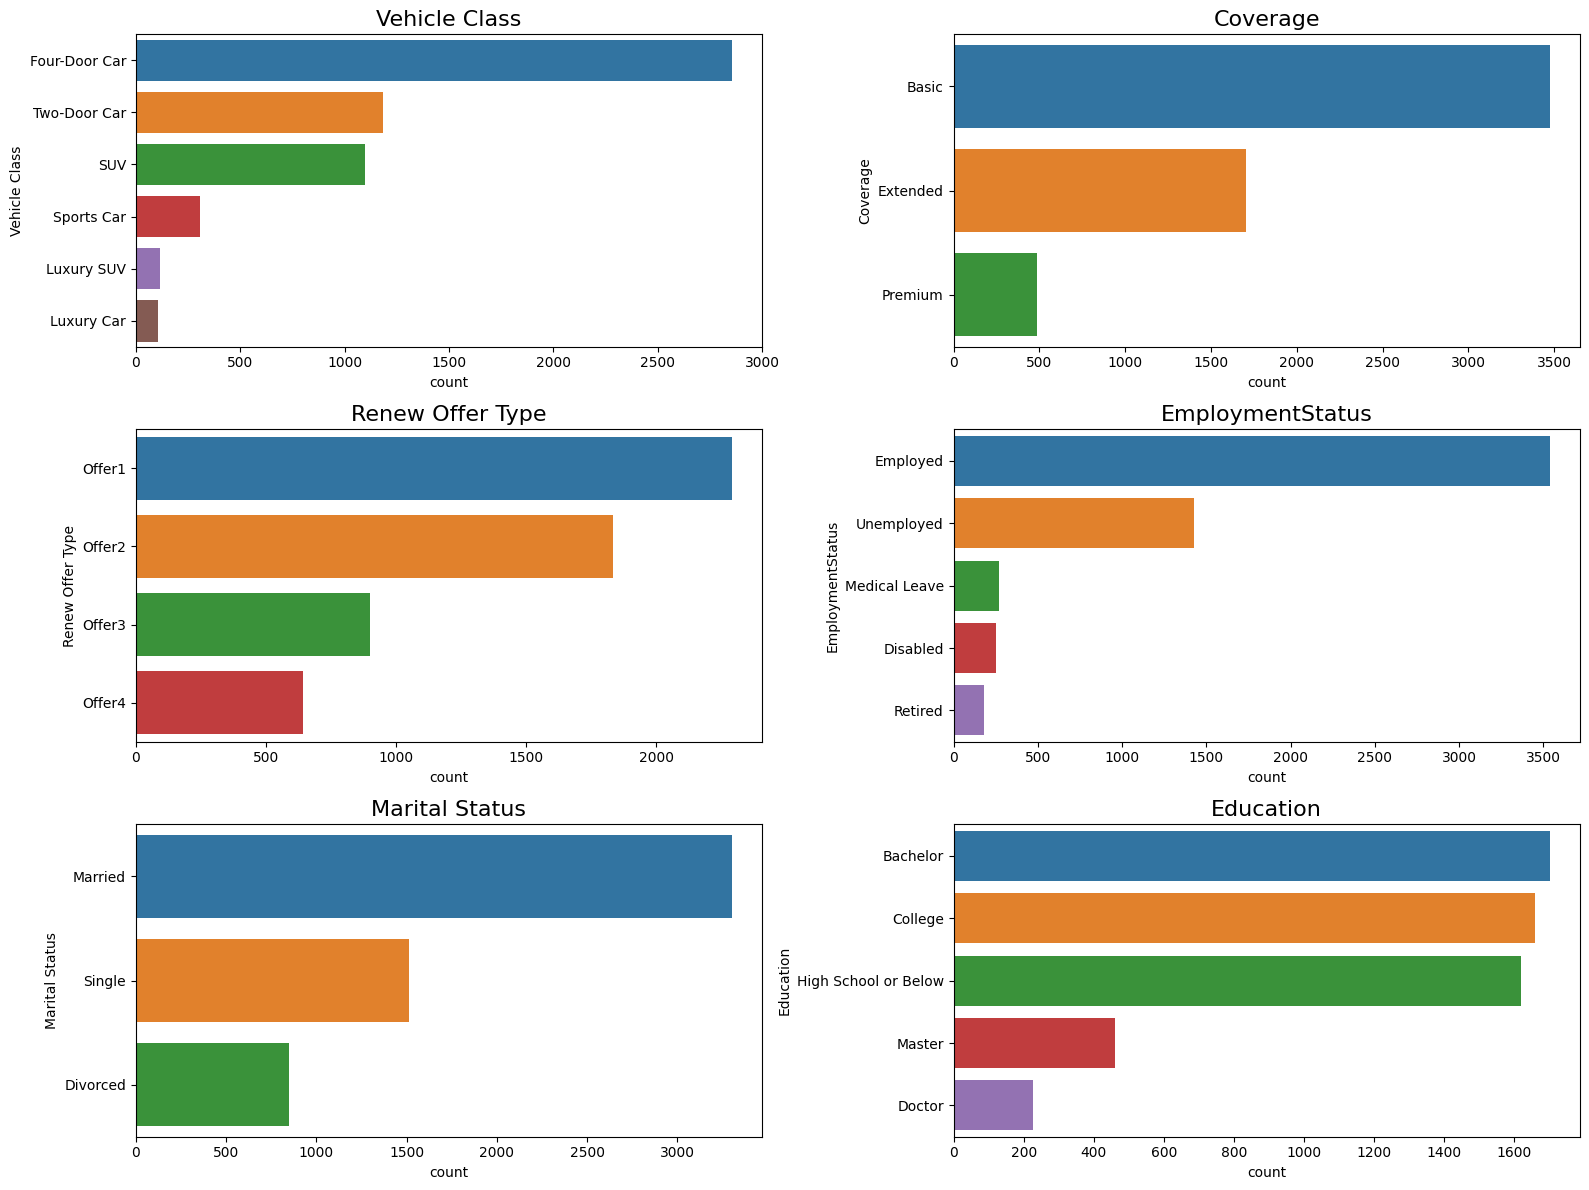

In [14]:
categorical_cols = list(clv.describe(include='O').columns)

plt.figure(figsize=(16,12))
num_subplot = 1

for i in categorical_cols:
    plt.subplot(3,2,num_subplot)
    sns.countplot(data=clv, y=i, order=clv[i].value_counts().index)
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

From the categorical features, it can be observed that:

- Customers with a **"Four-Door Car"** constitute the majority of those insuring their vehicles.
- Most customers opt for the **"Basic"** coverage package for their vehicle insurance.
- When renewing policies, the majority of customers receive **"Offer 1"** compared to other offers.
- The majority of vehicle insurance customers are **employed and married**.
- A significant portion of vehicle insurance customers have **a Bachelor's degree, are in college, or have a high school education or below**.

### Checking the Numerical Features Distribution

In [15]:
clv_columns = clv[['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']]

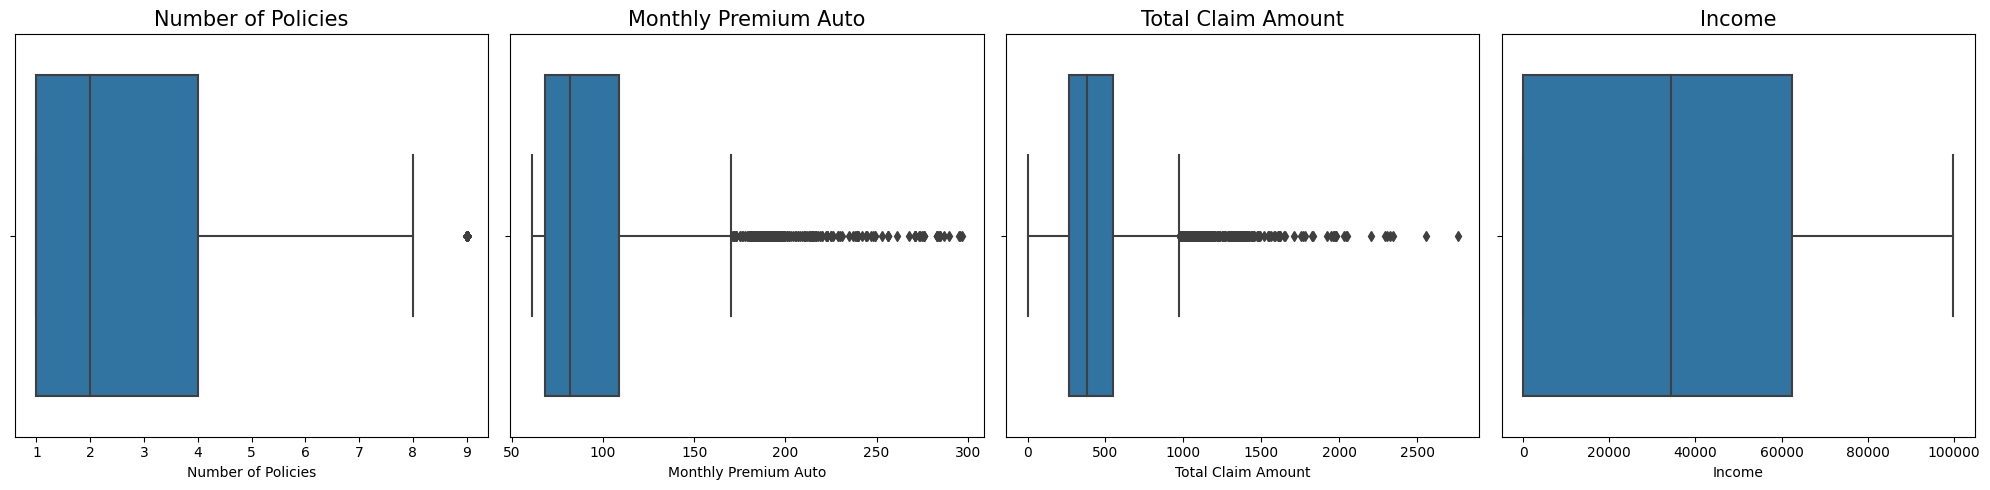

In [16]:
plt.figure(figsize=(20,5))
num_subplot = 1

for i in clv_columns:
    plt.subplot(1,4,num_subplot)
    sns.boxplot(data=clv, x=i)
    plt.title(i, size=15)
    plt.tight_layout()
    num_subplot+=1


Upon examining the distribution of our numerical features, I observed that they exhibit a right-skewed distribution, indicating a deviation from normality. Additionally, we detected outliers in the columns: **Monthly Premium Auto, Total Claim Amount, and Number of Policies.** I plan to address these outliers during the Data Preprocessing phase to ensure our analysis remains robust and accurate.

### Checking the Correlation of Numerical Feature vs Customer Lifetime Value

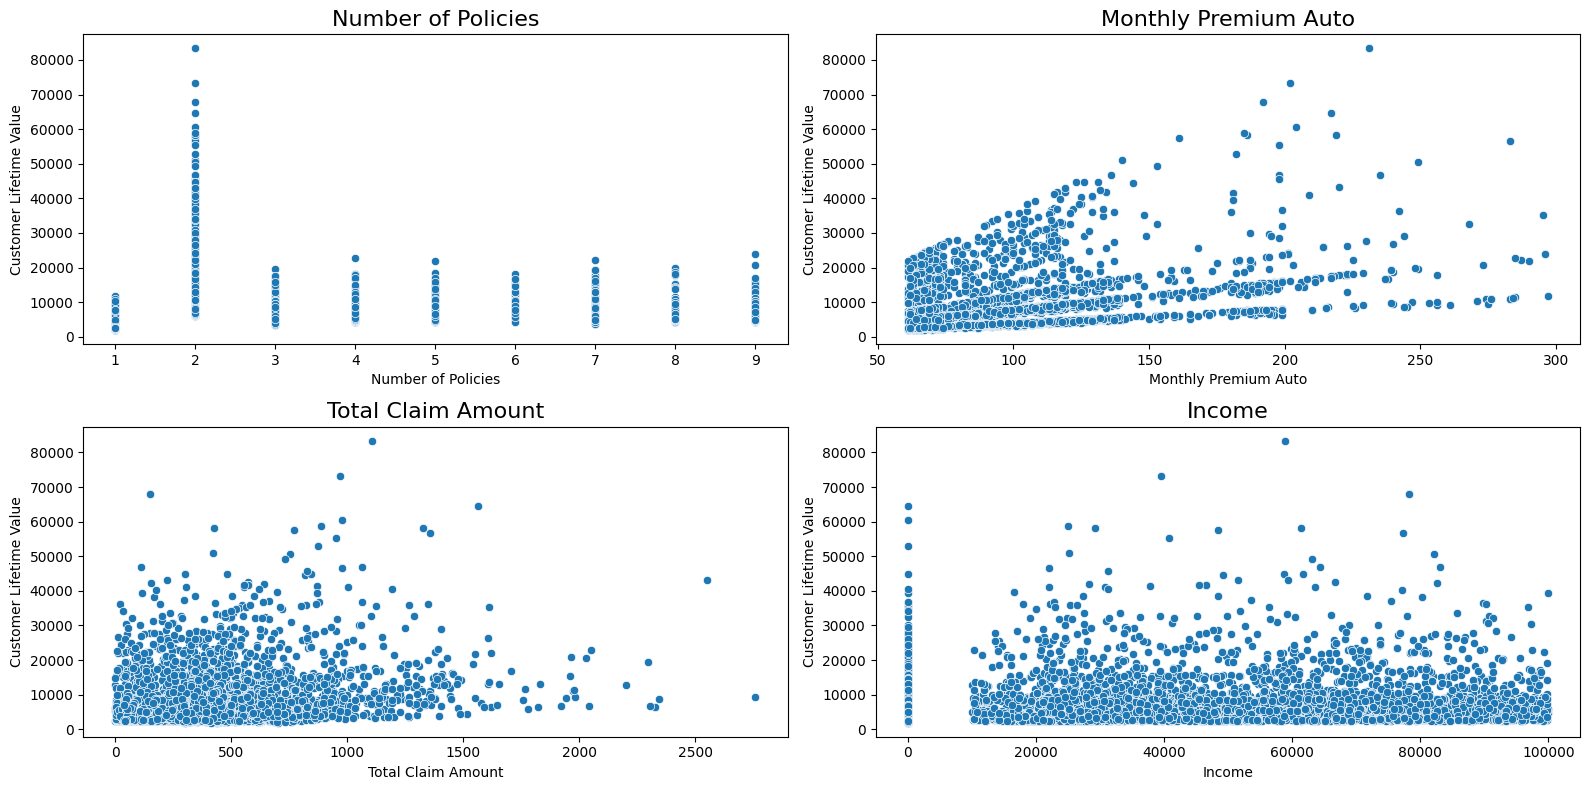

In [17]:
plt.figure(figsize=(16,8))
num_subplot = 1

for i in clv_columns:
    plt.subplot(2,2,num_subplot)
    sns.scatterplot(data=clv, x=i, y='Customer Lifetime Value')
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

Based on the scatter plot visualized:
- For the **Number of Policies** feature, customers with two policies appear to be more valuable than those with a different number of policies. Customers having other than two policies can be presumed as 'low-value' customers.
- In the **Monthly Premium Auto** feature, a dispersed pattern emerges indicating that the higher the monthly vehicle insurance premium paid, the more valuable the customer becomes.
- The **Total Claim Amount** feature shows that claims of less than $1,000 are predominantly made by 'low CLV' customers. However, claims exceeding $1,000 do not exhibit a specific trend; they are claimed both by 'low CLV' and 'high CLV' customers.
- As for the **Income** feature, it's notable that there are customers with no income but have a diverse CLV, even above 60,000. Beyond this, the Income data doesn't demonstrate any significant pattern shifts.

Text(0.5, 1.0, 'Heatmap Correlation')

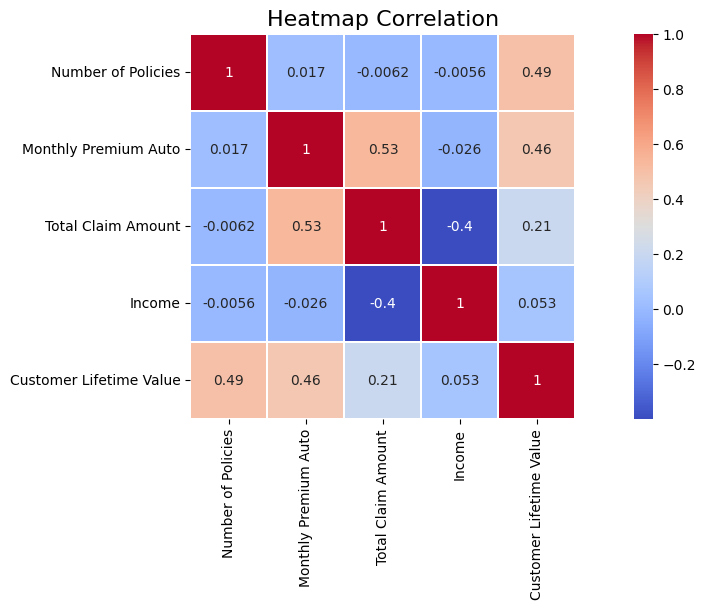

In [18]:
clv_columns = clv[['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']]

corr = clv_columns.corr('spearman')
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap= sns.color_palette("coolwarm", as_cmap=True), square=True, linewidths=0.05)
plt.title('Heatmap Correlation', size=16)

The heatmap above indicates that **Customer Lifetime Value** has the **strongest positive correlation** with the feature **Number of Policies (0.49)**. Meanwhile, the **Income** feature has **the weakest correlation** with **Customer Lifetime Value (0.053)**. Additionally, there are features that have a strong correlation with each other, namely **Monthly Premium Auto and Total Claim Amount (0.53)**.

### **Data info checking summary**

- found out 618 duplicate values in the data. Need to handle these by dropping the duplicates.
- No missing values were identified in any of the columns.
- No anomalies inside the data
- Based on the distribution plot of the **Customer Lifetime Value** above, it's evident that the data exhibits a **'right-skewed distribution'**. This suggests that there are many customers with a **'low CLV'** and very few with a **'high CLV'**. Additionally, the boxplot reveals the presence of customers with an **extremely high Customer Lifetime Value** which are considered outliers.
- Upon analyzing the dataset, I identified outliers in the columns: Monthly Premium Auto, Total Claim Amount, and Customer Lifetime Value. However, I plan to address these outliers during the Data Preprocessing phase to ensure our analysis remains robust and accurate.
- For the **Number of Policies** feature, customers with two policies appear to be more valuable than those with a different number of policies. Customers having other than two policies can be presumed as 'low-value' customers.
- In the **Monthly Premium Auto** feature, a dispersed pattern emerges indicating that the higher the monthly vehicle insurance premium paid, the more valuable the customer becomes.
- The **Total Claim Amount** feature shows that claims of less than $1,000 are predominantly made by 'low CLV' customers. However, claims exceeding $1,000 do not exhibit a specific trend; they are claimed both by 'low CLV' and 'high CLV' customers.
- As for the **Income** feature, it's notable that there are customers with no income but have a diverse CLV, even above 60,000. Beyond this, the Income data doesn't demonstrate any significant pattern shifts.
- Customers with a **"Four-Door Car"** constitute the majority of those insuring their vehicles.
- Most customers opt for the **"Basic"** coverage package for their vehicle insurance.
- When renewing policies, the majority of customers receive **"Offer 1"** compared to other offers.
- The majority of vehicle insurance customers are **employed and married**.
- A significant portion of vehicle insurance customers have **a Bachelor's degree, are in college, or have a high school education or below**.


## **Data Preprocessing**

Drop Duplicate Values

In this dataset, it is noted that there are 618 duplicate customer entries. It's essential to drop these duplicates to ensure that during the modeling process, the algorithm learns from unique data. If these duplicates are retained, the model's algorithm might overly focus on these repeated entries, leading to biased predictions that are not optimal. Therefore, the subsequent step will be to remove these 618 duplicate entries.

In [19]:
clv.drop_duplicates(inplace = True)

In [20]:
list = []
for i in clv.columns:
    list.append([i,clv[i].unique()])

pd.DataFrame(list, columns = ['Column Name','Unique Value'])

,Column Name,Unique Value
0,Vehicle Class,"[Four-Door Car, Two-Door Car, SUV, Sports Car,..."
1,Coverage,"[Extended, Basic, Premium]"
2,Renew Offer Type,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,"[Retired, Employed, Disabled, Medical Leave, U..."
4,Marital Status,"[Divorced, Married, Single]"
5,Education,"[High School or Below, College, Master, Bachel..."
6,Number of Policies,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, ..."
8,Total Claim Amount,"[571.479602, 114.51444, 257.248789, 556.8, 355..."
9,Income,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, ..."


Outliers Detections

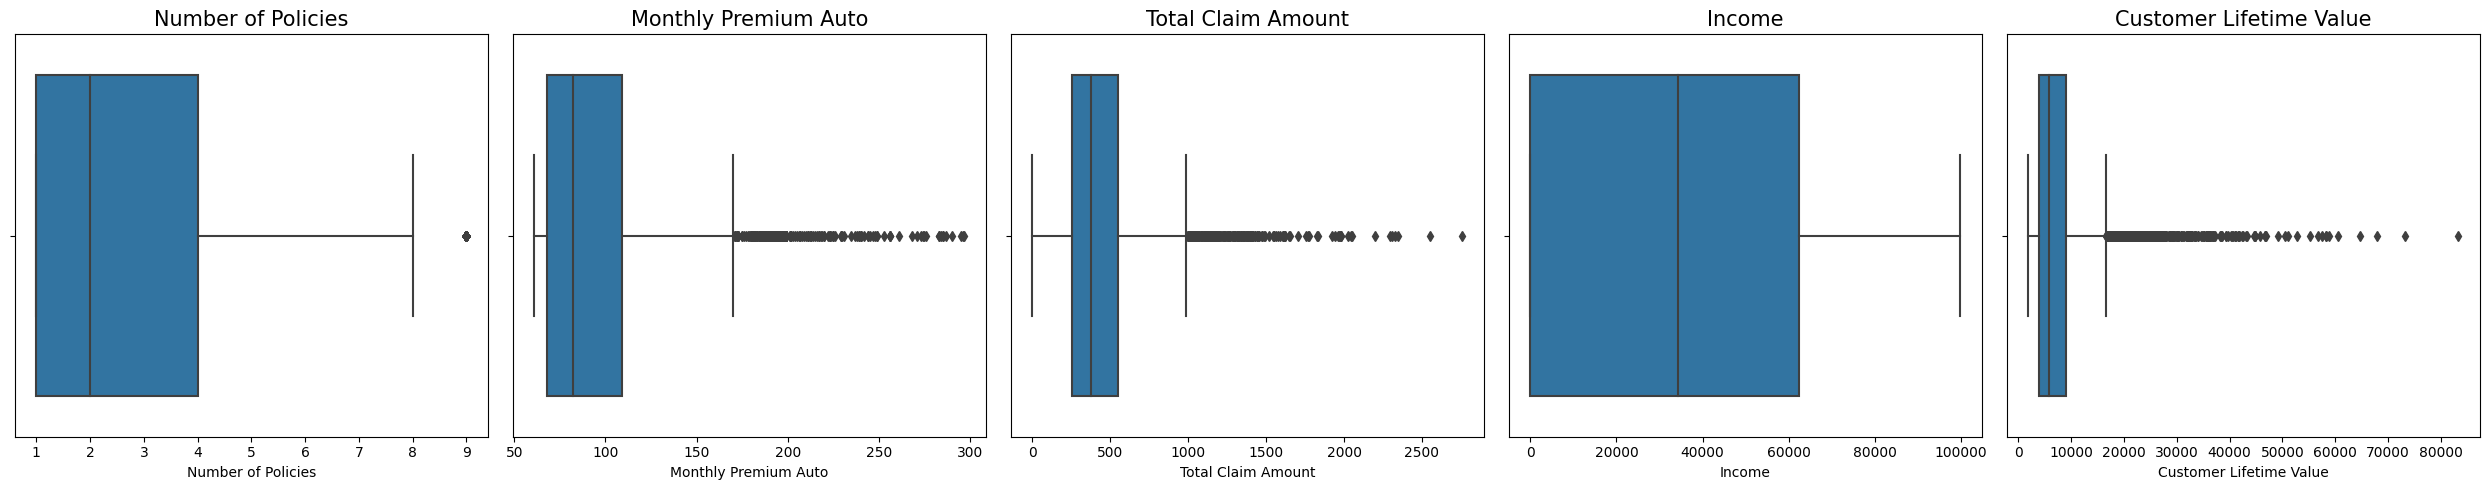

In [21]:
plt.figure(figsize=(25,5))
num_subplot = 1

for i in clv_columns:
    plt.subplot(1,5,num_subplot)
    sns.boxplot(data=clv, x=i)
    plt.title(i, size=15)
    plt.tight_layout()
    num_subplot+=1

From the boxplot above, we can observe the presence of outliers in several features: **Number of Policies, Monthly Premium Auto, Total Claim Amount, and Customer Lifetime Value**. In this project, I will address these outliers by considering the **IQR (Interquartile Range) values and domain knowledge**. This approach aims to cleanse the dataset, enhancing the model's performance and improving the prediction accuracy for CLV.

In [22]:
# Create IQR values detection function
def iqr_detection(data):
    q1 = clv[data].quantile(0.25)
    q3 = clv[data].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR Values {data}: {iqr}')

    upper = q3 + limit
    lower = q1 - limit
    print(f'Upperbound Values: {upper}')
    print(f'Lowerbound Values: {lower}')

In [23]:
# IQR Values of Number of Policies Outliers

iqr_detection('Number of Policies')

IQR Values Number of Policies: 3.0
Upperbound Values: 8.5
Lowerbound Values: -3.5


In [24]:
# IQR Values of Monthly Premium Auto

iqr_detection('Monthly Premium Auto')

IQR Values Monthly Premium Auto: 41.0
Upperbound Values: 170.5
Lowerbound Values: 6.5


In [25]:
#  IQR Values of Total Claim Amount

iqr_detection('Total Claim Amount')

IQR Values Total Claim Amount: 296.34681750000004
Upperbound Values: 992.6433477500001
Lowerbound Values: -192.74392225000005


In [26]:
# IQR Values of Customer Lifetime Value (Target)

iqr_detection('Customer Lifetime Value')

IQR Values Customer Lifetime Value: 5064.1236284999995
Upperbound Values: 16624.75007525
Lowerbound Values: -3631.744438749999


In [27]:
clv[['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value']].describe(percentiles=[.75, .90, .95])

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,8059.483178
std,2.386500,34.335010,293.129102,6989.189674
min,1.000000,61.000000,0.423310,1898.007675
50%,2.000000,82.000000,374.400000,5837.528088
75%,4.000000,109.000000,548.123122,9028.564632
90%,7.000000,130.000000,773.470977,15641.258560
95%,8.000000,170.000000,957.600000,21921.968055
max,9.000000,297.000000,2759.794354,83325.381190


In [28]:
display(f" Number of Policies Upperbound Values Count : {len(clv[clv['Number of Policies'] > 8.5])}")
display(f" Monthly Premium Auto Upperbound Values Count : {len(clv[clv['Monthly Premium Auto'] > 170.5])}")
display(f" Total Claim Amount Upperbound Values Count : {len(clv[clv['Total Claim Amount'] > 992.64])}")
display(f" Customer Lifetime Value Upperbound Values Count : {len(clv[clv['Customer Lifetime Value'] > 16624.75])}")

' Number of Policies Upperbound Values Count : 228'

' Monthly Premium Auto Upperbound Values Count : 252'

' Total Claim Amount Upperbound Values Count : 217'

' Customer Lifetime Value Upperbound Values Count : 449'

In [29]:
columns_to_filter = ['Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value']

# Calculate the lower and upper quantile values for each column
upper = clv[columns_to_filter].quantile(0.95)

# Apply the filtering for each column
for col in columns_to_filter:
    clv = clv[clv[col] <= upper[col]]

Outliers Detection Summary : 
- For the **Number of Policies** feature, it was found that the **upper bound value is 8.5**. Looking at the data volume, only the **value of 9** in Number of Policies exceeds this upper bound, representing **228 customers**. Although the boxplot indicates that customers with 9 policies are **considered outliers**, I chose not to drop these outliers so that predictions could be made for customers with up to 9 policies. This decision is further reinforced by the heatmap correlation, which shows that CLV has the strongest positive correlation with Number of Policies. This leads me to explore whether Number of Policies will be a significant feature influencing the model or not.
- For the **Monthly Premium Auto** feature, the upper bound value is found to be **$170.5**, with a total of **252 customers** exceeding this threshold. If I were to drop outliers for Monthly Premium Auto based solely on this upper bound value, we would lose a significant amount of data for modeling. I've filtered the data based on my domain knowledge, setting a threshold at the 95th percentile. This means that the top 5% of the data has been removed for better analysis.
- For the **Total Claim Amount** feature, the upper bound value is determined to be **$992.64**, with a total of **217 customers** exceeding this value. If outliers were dropped based solely on this upper bound value, a substantial amount of data would be lost, potentially compromising the effectiveness of the model. I've filtered the data based on my domain knowledge, setting a threshold at the 95th percentile. This means that the top 5% of the data has been removed for better analysis.
- It is evident that **75%** of the data for the **target Customer Lifetime Value is valued at less than 9028.56**, while the **maximum value is 83325.38**. However, when viewed based on its upper bound value, there are **449** data points where the Customer Lifetime Value exceeds 16624.75. I've filtered the data based on my domain knowledge, setting a threshold at the 95th percentile. This means that the top 5% of the data has been removed for better analysis.

### Clean Dataset

In [30]:
clv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4475 entries, 0 to 5666
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4475 non-null   object 
 1   Coverage                 4475 non-null   object 
 2   Renew Offer Type         4475 non-null   object 
 3   EmploymentStatus         4475 non-null   object 
 4   Marital Status           4475 non-null   object 
 5   Education                4475 non-null   object 
 6   Number of Policies       4475 non-null   float64
 7   Monthly Premium Auto     4475 non-null   float64
 8   Total Claim Amount       4475 non-null   float64
 9   Income                   4475 non-null   float64
 10  Customer Lifetime Value  4475 non-null   float64
dtypes: float64(5), object(6)
memory usage: 419.5+ KB


Initially, the dataset comprised 5,669 entries. However, after the necessary data cleaning and preprocessing, we are left with 5,051 data points that will be utilized for model building.

### Data Splitting

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [32]:
X = clv.drop(['Customer Lifetime Value'], axis = 1)
y = clv['Customer Lifetime Value']

# Data Splitting dengan proporsi test size 80:20
xtrain, xtest, ytrain, ytest = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state= 2023)

### Encoding

Encoding is a technique used in machine learning to convert categorical data into numerical format. In this project, I've chosen three methods: one-hot encoding for nominal categories, robust scaler Using the robust scaler to standardize the scale of numerical data.  and ordinal encoding for ordinal ones. One-hot encoding is suitable for categories without a specific order and a limited set of unique values. Meanwhile, ordinal encoding is reserved for categories that have a clear ranking or order. Here's a breakdown of how each encoding type is applied.

- Onehot: Vehicle Class, EmploymentStatus, Renew Offer type, Marital Status
- Ordinal: Coverage, Education
- Robust: Number of Policies, Monthly Premium Auto, Total Claim Amount, Income

In [33]:
# Ordinal mapping
ordinal_mapping = [
    {'col':'Coverage', 'mapping':{'Basic':1, 'Extended':2, 'Premium':3, None:0}},
    {'col':'Education', 'mapping':{'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5, None:0}}
]

transform = ColumnTransformer([
    ('Scaler', RobustScaler(), ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']),
    ('OHE', OneHotEncoder(drop='first'), ['Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', 'Marital Status']),
    ('Ordinal', OrdinalEncoder(mapping=ordinal_mapping), ['Coverage', 'Education'])
])

transform

ColumnTransformer(transformers=[('Scaler', RobustScaler(),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income']),
                                ('OHE', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'EmploymentStatus',
                                  'Renew Offer Type', 'Marital Status']),
                                ('Ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': Basic       1
Extended    2
Premium     3
None        0
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
None                    0
dtype: int64}]),
                                 ['Coverage', 'Education'])])

### Choose a Benchmark Model

In the initial phase, we will perform modeling on the 7 selected benchmark models. The results from these benchmark models, in terms of scoring, will be based on the chosen evaluation metrics: RMSE, MAE, and MAPE. The selection of these three metrics is to compare the model's performance by examining its residuals.

In [34]:
# Define the algorithm

lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state= 2023)
rf = RandomForestRegressor(random_state= 2023)
ada = AdaBoostRegressor(random_state= 2023)
xgb = XGBRegressor(random_state= 2023)
gbr = GradientBoostingRegressor(random_state= 2023)

models = [lr, knn, dt, rf, ada, xgb, gbr]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Finding the best algorithm based on each metrics

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=2023)

    estimator = Pipeline([
        ('preprocessing', transform),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-3717.90630799 -3485.46739063 -3772.19983005 -3830.05306866
 -3617.30752689] LinearRegression()
[-2513.35760827 -2530.48190441 -2589.6902141  -2630.75149189
 -2544.02109226] LinearRegression()
[-0.44853429 -0.49538546 -0.44913672 -0.46543918 -0.48828663] LinearRegression()
[-3776.29047879 -3602.20118465 -3788.77143701 -3931.56578438
 -3842.10121974] KNeighborsRegressor()
[-2427.07434439 -2464.78774441 -2435.65976027 -2533.88972365
 -2570.05524945] KNeighborsRegressor()
[-0.42050805 -0.47919196 -0.4154665  -0.43569019 -0.49671219] KNeighborsRegressor()
[-2884.08660123 -2334.12103787 -2709.98776    -2722.77225046
 -2417.56273976] DecisionTreeRegressor(random_state=2023)
[-1128.19131737  -801.86523876  -979.48824508  -982.76360616
  -799.0197189 ] DecisionTreeRegressor(random_state=2023)
[-0.11772554 -0.08022014 -0.09988233 -0.09284098 -0.08264496] DecisionTreeRegressor(random_state=2023)
[-1905.23435672 -1722.18073458 -1945.54452573 -2036.67248683
 -1846.60150137] RandomForestRegressor(

In [35]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'AdaBoost Regressor', 'XGBoost Regressor', 'GradientBoosting Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
}).sort_values('Mean_MAPE',ascending = False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
3,RandomForest Regressor,-1891.246721,104.755966,-753.507975,48.156699,-0.076069,0.004056
6,GradientBoosting Regressor,-1814.645891,110.080834,-804.378055,64.890772,-0.090916,0.005664
2,DecisionTree Regressor,-2613.706078,205.383166,-938.265625,124.696136,-0.094663,0.013531
5,XGBoost Regressor,-2017.525403,91.456931,-964.224402,20.323987,-0.128640,0.008915
4,AdaBoost Regressor,-2075.374357,125.897742,-1183.829504,95.825651,-0.149619,0.009809
1,KNN Regressor,-3788.186021,107.885876,-2486.293364,56.239866,-0.449514,0.032558
0,Linear Regression,-3684.586825,121.755253,-2561.660462,42.838424,-0.469356,0.019461


There is a significant difference between the RMSE and MAE values, where the RMSE value is higher because the residuals or errors are squared first before being averaged. This means that the RMSE gives a higher 'weight' to large error values. In other words, there are large error values produced by all the algorithms used, resulting in a significant difference between the RMSE and MAE values.

- Based on the **RMSE value**, the **GradientBoosting Regressor is the best model**. Whereas, based on the **MAE and MAPE values, RandomForest has the lowest value**.
- Next, predictions will be made on the test set using the two best benchmark models, which are **GradientBoosting and RandomForest**.

In [36]:
# Benchmark 2 Best Model
models = {
    'GradientBoosting': GradientBoostingRegressor(random_state= 2023),
    'RandomForest': RandomForestRegressor(random_state= 2023)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediction to test set
for i in models:

    model = Pipeline([
        ('preprocessing', transform),
        ('model', models[i])
        ])

    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    score_rmse.append(np.sqrt(mean_squared_error(ytest, y_pred)))
    score_mae.append(mean_absolute_error(ytest, y_pred))
    score_mape.append(mean_absolute_percentage_error(ytest, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
GradientBoosting,1886.293508,827.763316,0.088449
RandomForest,1925.541629,779.803298,0.077552


GradientBoosting

- RMSE From -1814.64 to 1886.29
- MAE From -804.37 to 827.76
- Mape From -0.090 to 0.088

RandomForest

- RMSE From -1891.24 to 1925.54	
- MAE From -753.50 to 779.80
- Mape From -0.076 to 0.077

Upon evaluating predictions on the test set, it's evident that **Gradient Boost outperforms the Random Forest model**. While the **RMSE, MAE, and MAPE metrics for Random Forest and Gradient Boost showed an increase**. But from the MAPE Scores, Gradient Boost outperformed Random Forest. This underscores the efficacy of the **Gradient Boost** in this particular context.

### Hyperparameter Tuning

Given the evident advantages of the Gradient Boost model over the Random Forest, we've chosen Gradient Boost as our primary model. At this juncture, our focus shifts to fine-tuning the Gradient Boost model to potentially enhance its accuracy.

For those unfamiliar, Gradient Boosting is an ensemble model method rooted in Decision Trees for supervised learning.

Gradient Boosting:

- Makes an initial prediction which is the average of the target (in this project, CLV).
- The model then calculates the initial residuals (the difference between observation data and the initial prediction) and subsequently creates a decision tree to predict these initial residuals.
- After that, the model creates a new prediction by combining the initial prediction with the predicted residuals. However, to prevent overfitting, the predicted residuals are scaled down using the Learning Rate. The Learning Rate is a value between 0 - 1 that determines how fast the model learns. By combining the initial prediction with the scaled-down predicted residuals using the learning rate, a new prediction value is obtained.
- This process continues until it reaches a predetermined maximum limit or the residuals no longer decrease significantly. In the end, the final prediction value is one that closely approaches the initial observation data (with small residuals).

For a comprehensive guide on refining the Gradient Boost model, one can delve into the [Tuning Gradient Boost.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

In [37]:
# depth of tree
max_depth = [int(x) for x in np.arange(3,10)]

# learning rate
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01]

# number of tree
n_estimators = [100, 200, 300, 400, 500]

# number of train set in each tree (% of total number of train set rows)
subsample = [float(x) for x in np.arange(2,11)/10]

# number of features used for splitting in tree (% of total number of train set columns)
max_features = [float(x) for x in np.arange(1,10)/10]
max_features.append(None)

# Hyperparameter space GBR
hyperparam_space_gbr = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__max_features': max_features
}

In [38]:
# Create algorithm chains
pipe_gbr = Pipeline([
    ('prep', transform),
    ('model', gbr)
])

# Hyperparameter tuning With RandomizedSearch
random_gbr = RandomizedSearchCV(
    estimator= pipe_gbr,
    param_distributions= hyperparam_space_gbr,
    n_iter= 200,
    cv = 5,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs= -1,
    refit = 'neg_root_mean_squared_error',
    random_state= 2023
)

In [39]:
random_gbr.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('Scaler',
                                                                               RobustScaler(),
                                                                               ['Number '
                                                                                'of '
                                                                                'Policies',
                                                                                'Monthly '
                                                                                'Premium '
                                                                                'Auto',
                                                                                'Total '
                                                                                'Claim '
                                                                                'Amount',
                                                                                'Income']),
                                                                              ('OHE',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(mapping=[{'co...
                                        'model__max_depth': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'model__max_features': [0.1, 0.2, 0.3,
                                                                0.4, 0.5, 0.6,
                                                                0.7, 0.8, 0.9,
                                                                None],
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8, 0.9,
                                                             1.0]},
                   random_state=2023, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [40]:
pd.DataFrame(random_gbr.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error',
                                                     'rank_test_neg_mean_absolute_error', 
                                                     'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
48,2.072804,0.195370,0.027527,0.004213,0.7,500,0.5,4,0.01,"{'model__subsample': 0.7, 'model__n_estimators...",...,53.008998,6,-0.084020,-0.087888,-0.077819,-0.080477,-0.079473,-0.081935,0.003603,6
96,1.541417,0.114736,0.026142,0.005570,0.3,400,None,4,0.01,"{'model__subsample': 0.3, 'model__n_estimators...",...,56.756998,11,-0.085038,-0.090006,-0.078743,-0.081653,-0.081160,-0.083320,0.003900,9
66,1.954476,0.165150,0.021447,0.001945,0.6,500,0.8,3,0.01,"{'model__subsample': 0.6, 'model__n_estimators...",...,53.579434,12,-0.085767,-0.089155,-0.078894,-0.081211,-0.080424,-0.083090,0.003800,8
171,2.838802,0.369785,0.024942,0.011746,1.0,500,0.8,3,0.025,"{'model__subsample': 1.0, 'model__n_estimators...",...,51.498910,22,-0.091676,-0.097564,-0.088762,-0.089852,-0.087130,-0.090997,0.003601,24
113,1.360041,0.229576,0.022144,0.003741,0.5,400,0.6,3,0.025,"{'model__subsample': 0.5, 'model__n_estimators...",...,49.447116,24,-0.093430,-0.097229,-0.087434,-0.092384,-0.091472,-0.092390,0.003159,25


In [41]:
print('Gradient Boost (by RandomizedSearchCV')
print('Best_score:', random_gbr.best_score_)
print('Best_params:', random_gbr.best_params_)

Gradient Boost (by RandomizedSearchCV
Best_score: -1815.0847516622312
Best_params: {'model__subsample': 0.7, 'model__n_estimators': 500, 'model__max_features': 0.5, 'model__max_depth': 4, 'model__learning_rate': 0.01}


In [42]:
# Model GradientBoosting
model = {'GBR': GradientBoostingRegressor(random_state= 2023)}

# Define the model to the best estimator
gbr_tuning = random_gbr.best_estimator_

# Fitting model
gbr_tuning.fit(xtrain, ytrain)

# Predict test set
y_pred_gbr_tuning = gbr_tuning.predict(xtest)

# Save the metrics value of RMSE, MAE & MAPE after tuning
rmse_gbr_tuning = np.sqrt(mean_squared_error(ytest, y_pred_gbr_tuning))
mae_gbr_tuning = mean_absolute_error(ytest, y_pred_gbr_tuning)
mape_gbr_tuning = mean_absolute_percentage_error(ytest, y_pred_gbr_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_gbr_tuning, 'MAE': mae_gbr_tuning, 'MAPE': mape_gbr_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
GBR,1882.924708,800.181986,0.082188


In [43]:
# depth of tree
max_depth = [3, 4, 7]

# learning rate
learning_rate = [0.1, 0.025, 0.01]

# number of tree
n_estimators = [200, 400, 500]

# number of train set in each tree (% of total number of train set rows)
subsample = [0.4, 0.6, 0.8, 1]

# number of features used for splitting in tree (% of total number of train set columns)
max_features = [0.5, 0.6, None]


# Hyperparameter space GBR
hyperparam_space_gbr = {
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features,
}

In [44]:
# Membuat algorithm chains
pipe_gbr = Pipeline([
    ('prep', transform),
    ('model', gbr)
])

# Hyperparameter tuning dengan GridSearch
grid_gbr = GridSearchCV(
    estimator=pipe_gbr,
    param_grid= hyperparam_space_gbr,
    cv= 5,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    refit = 'neg_root_mean_squared_error',
    n_jobs= -1,                          
    verbose= 1,
)

In [45]:
grid_gbr.fit(xtrain, ytrain)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('Scaler',
                                                                         RobustScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies',
                                                                          'Monthly '
                                                                          'Premium '
                                                                          'Auto',
                                                                          'Total '
                                                                          'Claim '
                                                                          'Amount',
                                                                          'Income']),
                                                                        ('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'EmploymentStatus',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'Co...
                                        GradientBoostingRegressor(random_state=2023))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.025, 0.01],
                         'model__max_depth': [3, 4, 7],
                         'model__max_features': [0.5, 0.6, None],
                         'model__n_estimators': [200, 400, 500],
                         'model__subsample': [0.4, 0.6, 0.8, 1]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'],
             verbose=1)

In [46]:
pd.DataFrame(grid_gbr.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__max_features,param_model__n_estimators,param_model__subsample,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
127,1.663142,0.136312,0.019748,0.002631,0.025,3,0.6,400,1,"{'model__learning_rate': 0.025, 'model__max_de...",...,49.862957,82,-0.087799,-0.091088,-0.082805,-0.084706,-0.083644,-0.086008,0.003051,87
275,4.078787,1.004311,0.032122,0.005792,0.01,4,0.6,500,1,"{'model__learning_rate': 0.01, 'model__max_dep...",...,58.357558,31,-0.083744,-0.086975,-0.075087,-0.077812,-0.076897,-0.080103,0.004498,32
115,1.682014,0.161423,0.021446,0.002748,0.025,3,0.5,400,1,"{'model__learning_rate': 0.025, 'model__max_de...",...,49.983569,89,-0.088195,-0.090961,-0.082726,-0.085300,-0.082805,-0.085998,0.003189,86
280,2.213108,0.201333,0.029026,0.004170,0.01,4,None,400,0.4,"{'model__learning_rate': 0.01, 'model__max_dep...",...,58.968384,44,-0.083917,-0.089088,-0.075972,-0.078503,-0.078401,-0.081176,0.004734,37
146,0.938695,0.124856,0.017155,0.001465,0.025,4,0.5,200,0.8,"{'model__learning_rate': 0.025, 'model__max_de...",...,53.999546,50,-0.084115,-0.088756,-0.078065,-0.080159,-0.079676,-0.082154,0.003854,46


In [47]:
print('Gradient Boost (by GridSearchCV')
print('Best_score:', grid_gbr.best_score_)
print('Best_params:', grid_gbr.best_params_)

Gradient Boost (by GridSearchCV
Best_score: -1811.0773111377634
Best_params: {'model__learning_rate': 0.025, 'model__max_depth': 3, 'model__max_features': 0.6, 'model__n_estimators': 400, 'model__subsample': 1}


In [48]:
# Model XGBoost
model = {'GBR': GradientBoostingRegressor(random_state= 2023)}

# Define model terhadap estimator terbaik
gbr_tuning = grid_gbr.best_estimator_

# Fitting model
gbr_tuning.fit(xtrain, ytrain)

# Predict test set
y_pred_gbr_tuning = gbr_tuning.predict(xtest)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_gbr_tuning = np.sqrt(mean_squared_error(ytest, y_pred_gbr_tuning))
mae_gbr_tuning = mean_absolute_error(ytest, y_pred_gbr_tuning)
mape_gbr_tuning = mean_absolute_percentage_error(ytest, y_pred_gbr_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_gbr_tuning, 'MAE': mae_gbr_tuning, 'MAPE': mape_gbr_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
GBR,1873.292677,811.318862,0.08577


After conducting hyperparameter tuning using RandomizedSearch and GridSearch, it was found that the performance of the Gradient Boost model slightly improved, with details as follows:

| Condition | RMSE | MAE | MAPE |
| --- | --- | --- | --- |
| Before Tuning | 1886.29 | 827.76 | 0.088 |
| After Tuning (RandomizedSearch) | 1882.92	| 800.18 | 0.082 |
| After Tuning (GridSearch) | 1873.29 | 811.31 | 0.085 |

Best parameter Randomized Search: 
- subsample: 0.7
- n_estimators: 500
- max_features: 0.5
- max_depth: 4
- learning_rate: 0.01

Best parameter Grid Search: 
- subsample: 1
- n_estimators: 400
- max_features: 0.6
- max_depth: 3
- learning_rate: 0.025

Based on Mean Absolute Percentage Error (MAPE), it's evident that GridSearch tuning outperforms both the non-tuned and RandomizedSearch-tuned models. It can be concluded that the model delivers good performance after tuning.



### **Evaluation by Residual Plot**
The prediction results from the Gradient Boost model above can be evaluated using a graphical summary, namely the residual plot. A residual plot is a scatter plot between the predicted values on the x-axis and the residuals on the y-axis. Through this residual plot, we can also gauge how far off our predictions can be.

In [49]:
# Membuat dataframe berisi data observasi, hasil prediksi, dan residual
clv_result = clv[['Customer Lifetime Value']]
clv_result['yPred'] = gbr_tuning.predict(X)
clv_result['residual'] = clv_result['Customer Lifetime Value'] - clv_result['yPred']
clv_result

,Customer Lifetime Value,yPred,residual
0,10083.486880,11303.920133,-1220.433253
1,4943.386117,5027.482175,-84.096058
2,11981.984810,10710.984040,1271.000770
3,4550.856045,4310.949086,239.906959
4,2372.155492,2538.862367,-166.706875
...,...,...,...
5660,4936.888359,5084.611142,-147.722783
5663,8114.409136,10343.491305,-2229.082169
5664,2442.216651,2531.169153,-88.952502
5665,12904.943360,13232.818858,-327.875498


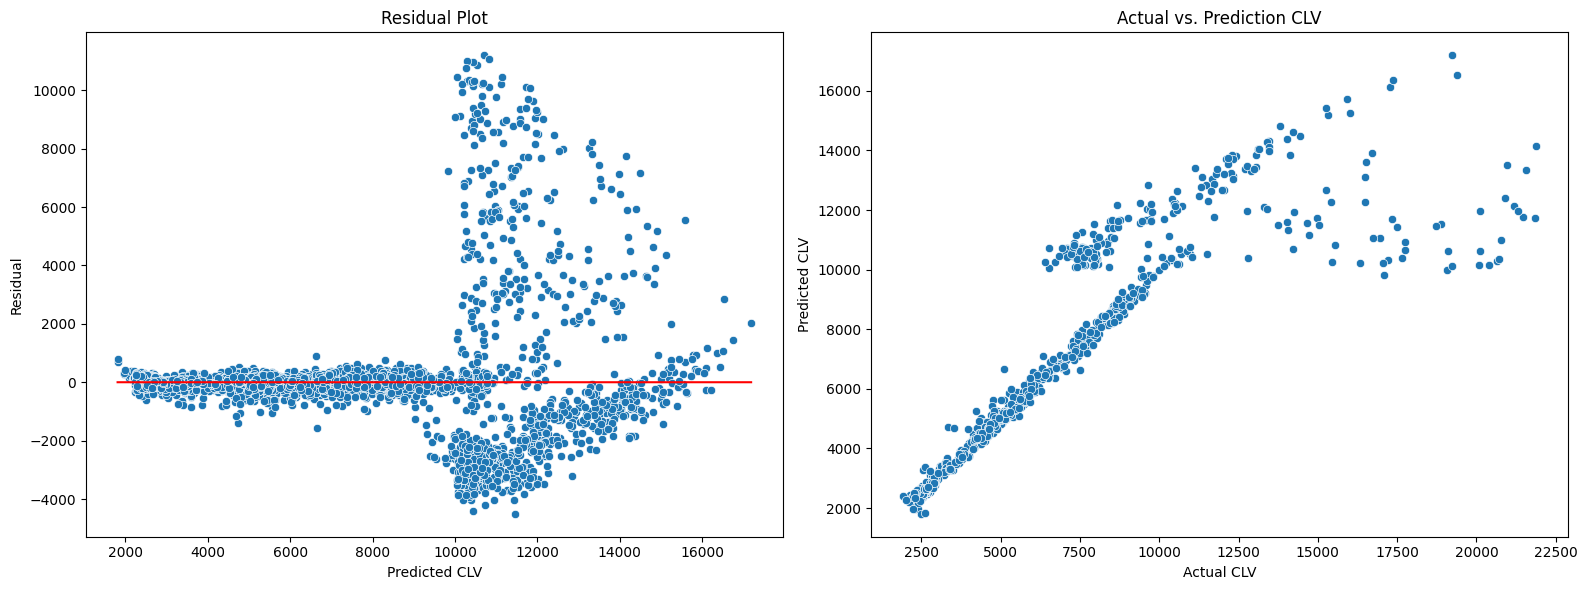

In [50]:
# Residual plot

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(data=clv_result, x='yPred', y='residual').set(title='Residual Plot', xlabel='Predicted CLV', ylabel='Residual')
sns.lineplot(data=clv_result, x='yPred', y=0, color='r')

plt.subplot(1,2,2)
sns.scatterplot(x=ytest, y=y_pred_gbr_tuning).set(title='Actual vs. Prediction CLV', xlabel='Actual CLV', ylabel='Predicted CLV')
plt.tight_layout()

The above residual plot indicates that the model's predictions are quite accurate for predicting CLV < 10,000, as evidenced by the numerous error values approaching 0. However, for CLV values above 8,000, the residual's variance appears to be non-uniform (there are overpredictions with errors reaching 5,000 and underpredictions with errors reaching 12,500). In the Actual vs. Predicted CLV plot, the prediction results also show some inaccuracies as the plot is scattered with outliers within the range of ± 10,000.

### Feature Importance

To determine which features significantly influence the target (Customer Lifetime Value), we can check them using the feature_importances_ function.

In [51]:
f_onehot = transform.named_transformers_['OHE'].get_feature_names_out(input_features=['Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', 'Marital Status'])
f_ordinal = ['Coverage', 'Education']
f_remain = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

# Convert f_onehot to a list and then concatenate
all_feat = f_onehot.tolist() + f_ordinal + f_remain

# 5. Construct a dataframe to hold these names and feature importances.
# Ensure that the way you are extracting feature importances is correct.
feature_imp = pd.DataFrame({
    'feature' : all_feat,
    'imp' : gbr_tuning['model'].feature_importances_
}).sort_values('imp', ascending=False)

print(feature_imp)



                           feature       imp
0                Vehicle Class_SUV  0.827522
1         Vehicle Class_Sports Car  0.112254
4   EmploymentStatus_Medical Leave  0.019761
16              Total Claim Amount  0.014560
2       Vehicle Class_Two-Door Car  0.007923
3        EmploymentStatus_Employed  0.007301
5         EmploymentStatus_Retired  0.002989
7          Renew Offer Type_Offer2  0.001558
8          Renew Offer Type_Offer3  0.001432
11           Marital Status_Single  0.001429
17                          Income  0.000893
10          Marital Status_Married  0.000819
14              Number of Policies  0.000498
9          Renew Offer Type_Offer4  0.000352
15            Monthly Premium Auto  0.000308
12                        Coverage  0.000227
13                       Education  0.000154
6      EmploymentStatus_Unemployed  0.000022


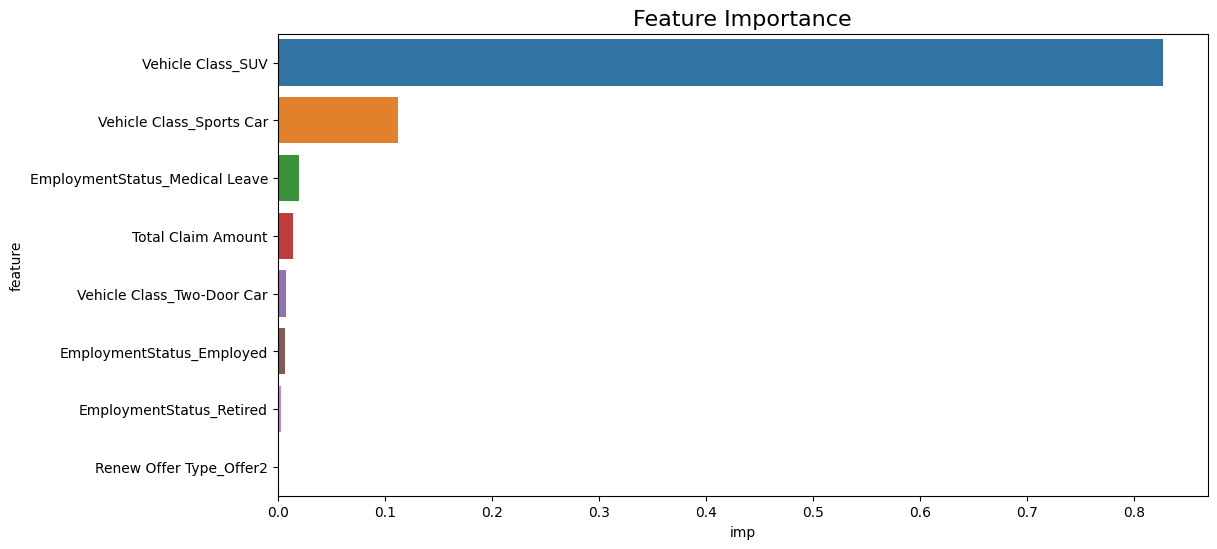

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(data=feature_imp.head(8), x='imp', y='feature')
plt.title('Feature Importance', size=16);

## **CONCLUSION**

In the modeling conducted, the feature `Vehicle Class with SUV and Sport Car` emerged as the most influential factor on `Customer Lifetime Value`.

The evaluation metrics employed for the model included Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE). If we consider the MAE (as it's more straightforward to interpret) `resulting from hyperparameter tuning, which is 822.31`, we can infer that, in the future, when the model estimates the CLV (Customer Lifetime Value) for an insurance company, within the `model's limitations (maximum CLV value of 16624.75)`, the estimated CLV may deviate by approximately `± 822.31` from the true CLV. Alternatively, considering the MAPE, the estimated CLV may deviate by approximately `± 8.5%` from the actual CLV.

However, it's worth noting that there is a possibility of more substantial deviations in predictions, particularly for CLV `estimates above 8000`, as there appears to be non-uniform variance in the residual plot. Any bias in the model could be attributed to the limited number of features and data in the dataset, which may not adequately represent the diverse range of CLV values.

## **Limitasi Model**

To bring attention to it, this model comes with limitations in predicting CLV (Customer Lifetime Value). When deploying the model, it's important to be aware that its accuracy may diminish when confronted with data exceeding the model's limitations. The model's limitations are as follows:

- `The maximum auto insurance premium cost (Monthly Premium Auto)` it can effectively predict is set at 95% of its value.
- `The maximum total claim amount (Total Claim Amount)` it can accurately handle is restricted to 95% of its value.
- It demonstrates proficiency in `predicting Customer Lifetime Value within a range up to 10,000`. Beyond this threshold, the model tends to introduce bias.

## **Recommendation**

`Model Prediction in Machine Learning:`
- This model can only predict customers range up to 10,000. More than that the prediction will not that accurate anymore. Therefore, it's imperative to augment the dataset to enhance the predictive performance of CLV.
- Furthermore, providing a more detailed explanation of the "Renew Offer Type" feature can greatly assist in optimizing the predictive model.
- Consider adding a time-related feature to determine how long a customer has been subscribed to auto insurance.

`Business:`
- Given that "Vehicle Class" emerges as the most influential feature in predicting CLV, it is advisable to create personalized offers for customers based on the type of vehicle they own. Personalized offers can be highly advantageous because the marketing budget can be tailored to individual needs, thereby avoiding overspending on low-value customers and retaining high-value customers.

`Let's assume that we need a months to calculate customer lifetime value. But by using machine learning we can just put the data and let the machine do the works. We can calculate the customer lifetime value just in 1 day or maybe a weeks if there are lots of data that need to calculate.`

Based on this source there are a lots of benefit about why Customer Lifetime Value are Important

[https://blog.hubspot.com/service/how-to-calculate-customer-lifetime-value#:~:text=Customer%20lifetime%20value%20can%20help%20reduce%20costs%20with,it%20can%20also%20reduce%20marketing%20and%20sales%20expenses.]

- Customer lifetime value can help reduce costs with a focus on retaining existing customers. If you can keep a customer happy long-term, then you can improve their value to the business.Using CLV metrics can improve customer loyalty and word-of-mouth referrals — it can also reduce marketing and sales expenses.
- Using the predictive model for customer lifetime value helps you better identify your most valuable customers, the product or service that brings in the most sales, and how you can improve customer retention.